In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
dataset_train=pd.read_csv("Netflix.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,298.059998,298.390015,288.700012,294.950012,294.950012,6764000
1,2023-01-04,298.239990,311.140015,295.510010,309.410004,309.410004,9345100
2,2023-01-05,307.000000,314.179993,304.549988,309.700012,309.700012,8328400
3,2023-01-06,311.570007,316.769989,303.690002,315.549988,315.549988,8959800
4,2023-01-09,316.829987,321.700012,313.220001,315.170013,315.170013,6766600


In [46]:
training_set = dataset_train.iloc[:,1:2].values
print('shape is ={}'.format(training_set.shape))
print(training_set[0:5])

shape is =(251, 1)
[[298.059998]
 [298.23999 ]
 [307.      ]
 [311.570007]
 [316.829987]]


In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set

array([[-1.6801473 ],
       [-1.67687164],
       [-1.51744894],
       [-1.43427976],
       [-1.33855382],
       [-1.44337922],
       [-1.16257005],
       [-1.05337654],
       [-1.09941978],
       [-1.07921924],
       [-1.15802032],
       [-1.23409167],
       [-0.97530302],
       [-0.8855825 ],
       [-0.59785765],
       [-0.5425328 ],
       [-0.393302  ],
       [-0.49466955],
       [-0.58129658],
       [-0.73525926],
       [-0.66464793],
       [-0.45899982],
       [-0.56964955],
       [-0.48666197],
       [-0.58002251],
       [-0.55254253],
       [-0.32705767],
       [-0.56819332],
       [-0.74399494],
       [-0.59749387],
       [-0.61423657],
       [-0.64390089],
       [-0.77293115],
       [-0.86501763],
       [-0.96238195],
       [-1.07648897],
       [-1.29360247],
       [-1.21043329],
       [-1.2135268 ],
       [-1.25265491],
       [-1.44538139],
       [-1.36366787],
       [-1.33545976],
       [-1.41407922],
       [-1.47577326],
       [-1

In [48]:
X_train = []
Y_train = []
for i in range(50,250):
    X_train.append(scaled_training_set[i-50:i, 0])
    Y_train.append(scaled_training_set[i, 0])
X_train = np.array(X_train)
Y_train = np.array(Y_train)
print(X_train.shape)
print(Y_train.shape)

(200, 50)
(200,)


In [49]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(200, 50, 1)

In [50]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [51]:
regressor = Sequential()
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.3))
regressor.add(Dense(units = 1))

In [52]:
from keras.optimizers import RMSprop
regressor.compile(optimizer=RMSprop(), loss='mean_squared_error')
regressor.fit(X_train, Y_train, epochs = 200, batch_size = 16)

Epoch 1/200
13/13 [==============================] - 7s 53ms/step - loss: 0.4019
Epoch 2/200
13/13 [==============================] - 1s 48ms/step - loss: 0.2395
Epoch 3/200
13/13 [==============================] - 1s 46ms/step - loss: 0.1748
Epoch 4/200
13/13 [==============================] - 1s 46ms/step - loss: 0.1926
Epoch 5/200
13/13 [==============================] - 1s 48ms/step - loss: 0.1836
Epoch 6/200
13/13 [==============================] - 1s 48ms/step - loss: 0.1708
Epoch 7/200
13/13 [==============================] - 1s 46ms/step - loss: 0.1738
Epoch 8/200
13/13 [==============================] - 1s 45ms/step - loss: 0.1282
Epoch 9/200
13/13 [==============================] - 1s 45ms/step - loss: 0.1524
Epoch 10/200
13/13 [==============================] - 1s 45ms/step - loss: 0.1294
Epoch 11/200
13/13 [==============================] - 1s 50ms/step - loss: 0.1264
Epoch 12/200
13/13 [==============================] - 1s 47ms/step - loss: 0.1089
Epoch 13/200
13/13 [=====

13/13 [==============================] - 1s 48ms/step - loss: 0.0444
Epoch 102/200
13/13 [==============================] - 1s 51ms/step - loss: 0.0450
Epoch 103/200
13/13 [==============================] - 1s 47ms/step - loss: 0.0406
Epoch 104/200
13/13 [==============================] - 1s 49ms/step - loss: 0.0438
Epoch 105/200
13/13 [==============================] - 1s 50ms/step - loss: 0.0454
Epoch 106/200
13/13 [==============================] - 1s 48ms/step - loss: 0.0422
Epoch 107/200
13/13 [==============================] - 1s 49ms/step - loss: 0.0520
Epoch 108/200
13/13 [==============================] - 1s 50ms/step - loss: 0.0549
Epoch 109/200
13/13 [==============================] - 1s 47ms/step - loss: 0.0420
Epoch 110/200
13/13 [==============================] - 1s 49ms/step - loss: 0.0489
Epoch 111/200
13/13 [==============================] - 1s 46ms/step - loss: 0.0471
Epoch 112/200
13/13 [==============================] - 1s 46ms/step - loss: 0.0491
Epoch 113/200
13/1

In [2]:
dataset_test = pd.read_csv("Netflix.csv")
predicted_stock_price = dataset_test.iloc[:,1:2].values

NameError: name 'pd' is not defined

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(50, 70):
    X_test.append(inputs[i-50:i, 0])
X_test = np.array(X_test)
Y_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [54]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 1s/step


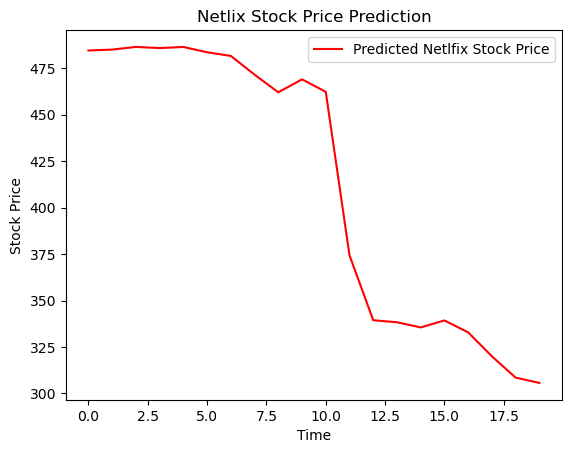

In [55]:
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Netlfix Stock Price')
plt.title('Netlix Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()